<p style="font-family: helvetica,arial,sans-serif; font-size:1.8em;color:white; background-color: black; height:28px; ">&emsp;<b>Evaluate Business Location Using Pedestrian Traffic: Day and Night</b></p>
    
<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD; ">&emsp;<b>Authored by: </b>Barkha Javed, Weiran Kong</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black; text-align:right">
<b>Duration:</b> 40 mins&emsp;</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #DDDDDD;">&emsp;<b>Level:</b> Intermediate&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<b>Pre-requisite Skills:</b>Python</p>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Scenario</b>

**As a business owner, I want to know how much pedestrian foot traffic occurs around me during the day and night, so that I can evaluate the suitability of the location and hours for my business.**

Busy foot traffic in a business area may not always mean busy foot traffic at night.

**As a business owner, I want to know how much pedestrian foot traffic I get compared to surrounding areas, so that I can assess if it is better to adapt my hours, extend or move locations.**

A retailer with an online store presence may also be impacted by foot traffic, high foot traffic may mean increasing staff levels during specific hours. Significantly low foot traffic in comparison to other streets may mean adapting business strategy or moving location. Duration of steady foot traffic from early morning to mid afternoon only, may indicate adapting business hours to match.


@Weiran - was thinking of removing this item below - unless you want to add it in please?

**As a new business owner, I would like to know where similar businesses are located and the density of residents and office workers in comparison, so that I can evaluate the suitability of a location for my business.**

For example the density of residents may indicate expected foot traffic thresholds, but office workers may also be working from home, some week days may have higher foot traffic than others.


<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>What this Use Case will teach you</b>

At the end of this use case you will understand how to:

* Load and examine the pedestrian sensor location dataset
* Load and examine the pedestrian counting system - monthly (counts per hour)monthly hourly counts dataset
* Load and examine the census of land use and employment dataset
* Load and mesh with CLUE data for expected foot traffic from local residents and office workers
* Use these datasets to explore day and night foot traffic in an area
* Use visualisations to share results
* Use machine learning


<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>A brief introduction to the datasets used</b>

Briefly about each dataset and intended use 

* For more information on using CLUE refer to the usecase on a new business location 


The exploratory data analysis on day and night showing initial findings is available, please refer to [compare pedestrian traffic day night]( https://github.com/Chameleon-company/MOP-Code/blob/barkhaj-branch/datascience/dataanalysis/Other%20EDA/eda_compare_pedestrian_traffic_day_night.ipynb)

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Accessing and Loading data</b>

In [1]:
#Libraries to be installed
##!pip -q is to give less output
!pip -q install sodapy
!pip -q install seaborn
!pip -q install pandas
!pip -q install matplotlib
!pip -q install numpy
!pip -q install nbconvert
!pip -q install keyboard
!pip -q install geopandas
!pip -q install sklearn

In [2]:
#load libraries
import os
import time
import keyboard

from datetime import datetime
import numpy as np
import pandas as pd
from sodapy import Socrata

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

#Socrata client connection
client = Socrata('data.melbourne.vic.gov.au', '9UAGAvkem9fqXDhBLElapjazL', None)


In [3]:
#Pedestrian sensor location data
sensor_data_id = "h57g-5234"
results = client.get(sensor_data_id)
sensor_location = pd.DataFrame.from_records(results)
#sensor_location.head(5)

sensor_location[['latitude', 'longitude']] = sensor_location[['latitude', 'longitude']].astype(float)
sensor_location = sensor_location.drop('location',axis=1)

#View sensor data
sensor_location.info()
sensor_location.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sensor_id           91 non-null     object 
 1   sensor_description  91 non-null     object 
 2   sensor_name         91 non-null     object 
 3   installation_date   91 non-null     object 
 4   status              91 non-null     object 
 5   note                10 non-null     object 
 6   latitude            91 non-null     float64
 7   longitude           91 non-null     float64
 8   direction_1         78 non-null     object 
 9   direction_2         78 non-null     object 
dtypes: float64(2), object(8)
memory usage: 7.2+ KB


,sensor_id,sensor_description,sensor_name,installation_date,status,note,latitude,longitude,direction_1,direction_2
0,16,Australia on Collins,Col270_T,2009-03-30T00:00:00.000,R,Device moved to location ID 53 (22/09/2015),-37.815734,144.965210,NaN,NaN
1,50,Faraday St-Lygon St (West),Lyg309_T,2017-11-30T00:00:00.000,A,NaN,-37.798082,144.967210,South,North
2,73,Bourke St - Spencer St (South),Bou655_T,2020-10-02T00:00:00.000,I,NaN,-37.816957,144.954154,East,West
3,66,State Library - New,QVN_T,2020-04-06T00:00:00.000,A,NaN,-37.810578,144.964443,South,North
4,59,Building 80 RMIT,RMIT_T,2019-02-13T00:00:00.000,A,NaN,-37.808256,144.963049,South,North


In [4]:
#Pedestrian foot count data 
#Uncomment the below to open data source, download sensor data, and store it as a csv locally.
sensor_data_id = "b2ak-trbp"
#results = client.get(sensor_data_id, limit=7000000)
#ds_traffic = pd.DataFrame.from_records(results)
#ds_traffic.to_csv('sensor_traffic.csv', index=False)

sensor_traffic = pd.read_csv('sensor_traffic.csv')
sensor_traffic.info()

print(f'\nThe shape of dataset is {sensor_traffic.shape}. \n')
print('Below are the first few rows of this dataset: ')
sensor_traffic.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463670 entries, 0 to 4463669
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   id             int64 
 1   date_time      object
 2   year           int64 
 3   month          object
 4   mdate          int64 
 5   day            object
 6   time           int64 
 7   sensor_id      int64 
 8   sensor_name    object
 9   hourly_counts  int64 
dtypes: int64(6), object(4)
memory usage: 340.6+ MB

The shape of dataset is (4463670, 10). 

Below are the first few rows of this dataset: 


,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,2887628,2019-11-01T17:00:00.000,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,2019-11-01T17:00:00.000,2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,2019-11-01T17:00:00.000,2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,2019-11-01T17:00:00.000,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,2019-11-01T17:00:00.000,2019,November,1,Friday,17,36,Queen St (West),774
5,2887633,2019-11-01T17:00:00.000,2019,November,1,Friday,17,29,St Kilda Rd-Alexandra Gardens,644
6,2887634,2019-11-01T17:00:00.000,2019,November,1,Friday,17,42,Grattan St-Swanston St (West),453
7,2887635,2019-11-01T17:00:00.000,2019,November,1,Friday,17,43,Monash Rd-Swanston St (West),387
8,2887636,2019-11-01T17:00:00.000,2019,November,1,Friday,17,44,Tin Alley-Swanston St (West),27
9,2887637,2019-11-01T17:00:00.000,2019,November,1,Friday,17,35,Southbank,2691


In [5]:
#Add date column
sensor_traffic['date'] = pd.to_datetime(sensor_traffic.date_time).dt.date

#Add day of week column
sensor_traffic['dow'] = pd.to_datetime(sensor_traffic.date_time).dt.day_of_week

#convert sensor_id to integer
sensor_traffic['sensor_id']=sensor_traffic['sensor_id'].astype(int)
sensor_location['sensor_id']=sensor_location['sensor_id'].astype(int)

# Mesh pedestrian sensor location and foot traffic datasets
sensor_ds = pd.merge(sensor_traffic, sensor_location, on='sensor_id')

#Simply using the year to differentiate all the years prior to 2020 as before Covid, and post 2019 Covid traffic to now
sensor_ds['pre2020_hourly_counts'] = np.where(sensor_ds['year']<=2019,sensor_ds['hourly_counts'] , 0)
sensor_ds['post2019_hourly_counts'] = np.where(sensor_ds['year']>2019,sensor_ds['hourly_counts'] , 0)

#Add column for day or night traffic
#Add column for day (5am to 5pm) or night (6pm to 4am) traffic
sensor_ds['day_counts']   = np.where(((sensor_ds['time']>4)  & (sensor_ds['time']<18)),sensor_ds['hourly_counts'] , 0)
sensor_ds['night_counts'] = np.where(sensor_ds['day_counts']==0,sensor_ds['hourly_counts'], 0)

sensor_ds.describe()


,id,year,mdate,time,sensor_id,hourly_counts,dow,latitude,longitude,pre2020_hourly_counts,post2019_hourly_counts,day_counts,night_counts
count,4.463670e+06,4.463670e+06,4.463670e+06,4.463670e+06,4.463670e+06,4.463670e+06,4.463670e+06,4.463670e+06,4.463670e+06,4.463670e+06,4.463670e+06,4.463670e+06,4.463670e+06
mean,2.232320e+06,2.017230e+03,1.574741e+01,1.146917e+01,2.700226e+01,4.951352e+02,2.999995e+00,-3.781345e+01,1.449621e+02,4.074119e+02,8.772332e+01,3.594659e+02,1.356693e+02
std,1.289316e+06,3.551188e+00,8.800020e+00,6.938594e+00,1.951539e+01,7.509822e+02,2.000015e+00,6.187582e-03,8.531568e-03,7.443612e+02,2.852713e+02,7.131327e+02,3.910920e+02
min,1.000000e+00,2.009000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-3.782402e+01,1.449297e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.115918e+06,2.015000e+03,8.000000e+00,5.000000e+00,1.100000e+01,4.300000e+01,1.000000e+00,-3.781874e+01,1.449587e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.231836e+06,2.018000e+03,1.600000e+01,1.100000e+01,2.300000e+01,1.780000e+02,3.000000e+00,-3.781381e+01,1.449651e+02,6.200000e+01,0.000000e+00,2.400000e+01,0.000000e+00
75%,3.347753e+06,2.020000e+03,2.300000e+01,1.700000e+01,4.100000e+01,6.050000e+02,5.000000e+00,-3.781102e+01,1.449669e+02,4.530000e+02,2.400000e+01,3.520000e+02,5.900000e+01
max,4.469141e+06,2.022000e+03,3.100000e+01,2.300000e+01,8.700000e+01,1.597900e+04,6.000000e+00,-3.779432e+01,1.449747e+02,1.597900e+04,1.443700e+04,1.161200e+04,1.597900e+04


### Seperate day and night data sets

In [6]:
flag_value=0
df_day=sensor_ds.query("day_counts > @flag_value")
print('Day info \n',df_day.info(),'\n')

df_night=sensor_ds.query("day_counts == @flag_value")
print('Night info \n',df_night.info(),'\n')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402520 entries, 0 to 4463663
Data columns (total 25 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id                      int64  
 1   date_time               object 
 2   year                    int64  
 3   month                   object 
 4   mdate                   int64  
 5   day                     object 
 6   time                    int64  
 7   sensor_id               int32  
 8   sensor_name_x           object 
 9   hourly_counts           int64  
 10  date                    object 
 11  dow                     int64  
 12  sensor_description      object 
 13  sensor_name_y           object 
 14  installation_date       object 
 15  status                  object 
 16  note                    object 
 17  latitude                float64
 18  longitude               float64
 19  direction_1             object 
 20  direction_2             object 
 21  pre2020_hourly_counts   int64  

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Day Economy</b>

Refer to the EDA on [Compare Pedestrian Traffic Day and Night](https://github.com/Chameleon-company/MOP-Code/blob/barkhaj-branch/datascience/dataanalysis/Other%20EDA/eda_compare_pedestrian_traffic_day_night.ipynb) for details around why specific criteria were chosen

### Data Preparation for Clustering: Day Traffic

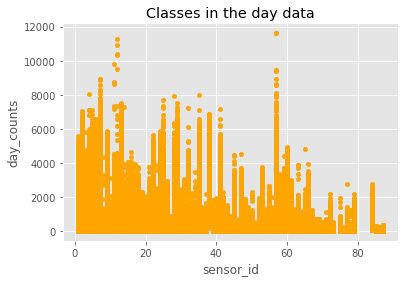

There are several classes in the day hours data


In [41]:
#how many classes are there in the day data
df_day.plot(kind="scatter",x="sensor_id",y="day_counts",color='Orange')
plt.title('Classes in the day data')
plt.show()
print("There are several classes in the day hours data")


In [25]:
#identify class and features
class_list = ["sensor_id"]
features_list = ["hourly_counts","dow"]

#separate class and features
df_class = pd.DataFrame(df_day[class_list])
df_features = pd.DataFrame(df_day[features_list])

#examine data
df_features.describe()

,hourly_counts,dow
count,2.402520e+06,2.402520e+06
mean,6.678559e+02,2.998409e+00
std,8.595908e+02,1.999525e+00
min,1.000000e+00,0.000000e+00
25%,1.050000e+02,1.000000e+00
50%,3.040000e+02,3.000000e+00
75%,8.810000e+02,5.000000e+00
max,1.161200e+04,6.000000e+00


Using the elbow method on the features dataset, the optimal number of clusters is 4


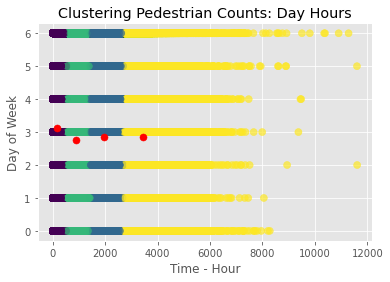

Predicted        0       1       2       3      All
True                                               
1            18093   14779   10554   12829    56255
2            20654   16589   13015   12541    62799
3            20109   21385   14595    3875    59964
4            16459   12108    9598   19824    57989
5            16622   21618   18814    4056    61110
...            ...     ...     ...     ...      ...
84             700    1018    1440       1     3159
85            3143       0       0       0     3143
86            2938       0       0       0     2938
87             804       0       0       0      804
All        1514175  263202  521251  103892  2402520

[83 rows x 5 columns]

 Purity score is 0.895


In [44]:
print("Using the elbow method on the features dataset, the optimal number of clusters is 4")

# use complete loaded features data set
# define centroids

df = df_features
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
#print("centroids \n", centroids,"\n")

plt.scatter(df['hourly_counts'], df['dow'], c= kmeans.labels_.astype(float), s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.ylabel('Day of Week')
plt.xlabel('Time - Hour')
plt.title('Clustering Pedestrian Counts: Day Hours')
plt.show()

#predicted by kmeans
y_pred = kmeans.labels_

#actual value
y_true = df_day["sensor_id"].values


# Confusion Matrix
confusion_matrix = pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins = True)
print(confusion_matrix)


purity_score = (60+60+68)/(210)
print("\n Purity score is" ,"{:.3f}".format(purity_score))

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>Night Economy</b>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>CLUE Residential Dwelling</b>

In [ ]:
# Retrieve the "CLUE Residential Dwellings" dataset
data_rm92_h5tq = pd.DataFrame.from_dict(client.get_all('rm92-h5tq'))

print(f'The shape of dataset is {data_rm92_h5tq.shape}.')
print('Below are the first few rows of this dataset:')

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:black; background-color: #EEEEEE">&emsp;<b>Congratulations!</b>

You've successfully used Melbourne Open Data to visualise day and night pedestrian traffic in and around the City of Melbourne!<br>

<p style="font-family: helvetica,arial,sans-serif; font-size:1.6em;color:white; background-color: black">&emsp;<b>References</b>

City of Melbourne Open Data Team, 2014 - 2021,'Pedestrian Counting System - Monthly (counts per hour)', City of Melbourne, date retrieved 11 Aug 2022, <https://dev.socrata.com/foundry/data.melbourne.vic.gov.au/b2ak-trbp>

City of Melbourne Open Data Team, 2014 - 2021,'Pedestrian Counting System - Sensor Locations', City of Melbourne, date retrieved 26 Aug 2022, <https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Sensor-Locations/h57g-5234>

Hyunh, N.D, 2022,'Pedestrian Foot Traffic Business Case', City of Melbourne, date retrieved 18 Sep 2022, <https://master-mop-busaytgm.ts.gateway.dev/use-cases/pedestrian-traffic-analysis>

Tuften S, 2021,'New Business Location Use Case', City of Melbourne, date retrieved 18 Sep 2022, <https://master-mop-busaytgm.ts.gateway.dev/use-cases/new-business-location>

In [ ]:
#save notebook, required so that step to convert to html, writes latest results to file
# may need to adapt for other OS, this is for Windows
keyboard.press_and_release('ctrl+s')

!jupyter nbconvert  evaluate_business_location_using_pedestrian_traffic_day_night.ipynb --to html